In [ ]:
#Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
# Reading data from link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.shape

(25, 2)

In [ ]:
#checking the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data Visualization**

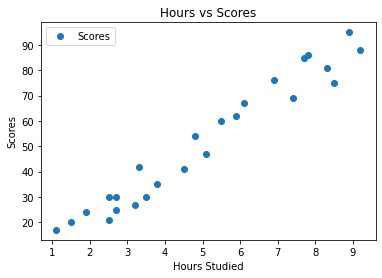

In [ ]:
#Scatter plot of distribution
df.plot(x = 'Hours', y= 'Scores', style='o')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.show()

**Linear Regression**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size = 0.8, test_size = 0.20, random_state = 42)

In [ ]:
#Training the model
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


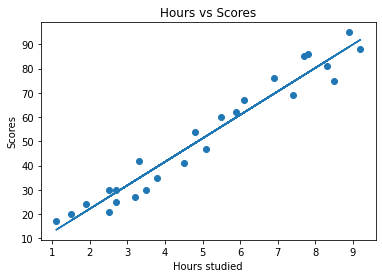

In [ ]:
line = regressor.coef_*X + regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.title("Hours vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.show()

**Checking accuracy of model**

In [ ]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))


Test Score
0.9678055545167994
Training Score
0.9491209376364417


In [ ]:
y_test

array([81, 30, 21, 76, 62])

In [ ]:
y_predict

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959,
       33.80954245, 46.39624405, 88.99738793, 85.12455667, 36.71416589,
       28.96850337, 21.22284085, 49.3008675 , 61.8875691 , 78.34710196,
       56.0783222 , 77.37889414, 13.47717832, 74.4742707 , 91.90201137])

In [ ]:
y_predict[:5]

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict[:5]})
df

,Actual,Predicted
0,81,28.968503
1,30,34.777750
2,21,52.205491
3,76,39.618789
4,62,17.350010


**Predicted Score if student studies 9.25 hrs/day**

In [ ]:
print('Score of student who studied for 9.25 hrs/day:', regressor.predict([[9.25]]))

Score of student who studied for 9.25 hrs/day: [92.38611528]


In [ ]:
#Checking the efficiency of model
mean_squ_error = mean_squared_error(y_test,y_predict[:5])
mean_abs_error = mean_absolute_error(y_test, y_predict[:5])
print('Mean Squared Error:', mean_squ_error)
print('Mean Absolute Error:', mean_abs_error)

Mean Squared Error: 1404.2200673968694
Mean Absolute Error: 33.80918778157651
